In [36]:
!pip install pandas numpy seaborn matplot scikit-learn

In [37]:
import pandas as pd

In [38]:
education_income = pd.read_csv('edu_year_incoming.csv')

In [39]:
education_income.head()

,Freq,Indic_Il,Unit,Isced11,Sex,Age,Country,Year,Income
0,A,MED_E,EUR,ED0-2,F,Y18-64,AT,2003,14045
1,A,MED_E,EUR,ED0-2,F,Y18-64,AT,2004,15190
2,A,MED_E,EUR,ED0-2,F,Y18-64,AT,2005,15258
3,A,MED_E,EUR,ED0-2,F,Y18-64,AT,2006,15376
4,A,MED_E,EUR,ED0-2,F,Y18-64,AT,2007,15552


##### No need of frequency

Also we need just european union country codes.
Country | Code
--------------------------------------------------------------------
Belgium	(BE) | Greece	(EL) 	Lithuania(LT)	Portugal(PT)
--------------------------------------------------------------------
Bulgaria(BG)	Spain	(ES)	Luxembourg(LU)	Romania(RO)
Czechia	(CZ)	France	(FR)	Hungary	(HU)	Slovenia(SI)
--------------------------------------------------------------------
Denmark	(DK)	Croatia	(HR)	Malta	(MT)	Slovakia(SK)
Germany	(DE)	Italy	(IT)	Netherlands(NL)	Finland(FI)
--------------------------------------------------------------------
Estonia	(EE)	Cyprus	(CY)	Austria	(AT)	Sweden(SE)
Ireland	(IE)	Latvia	(LV)	Poland	(PL)
--------------------------------------------------------------------

In [40]:
# education_income.drop(columns=['Freq'], inplace=True)
valid_country_codes = ['BE','BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'EL', 'ES','FR','HR','IT','CY','LV','LT','LU','HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE']
education_income = education_income[education_income['Country'].isin(valid_country_codes)]

In [41]:
education_income['Income'] = education_income['Income'].str.replace(r'[a-z]', '', regex=True)
education_income.drop(columns=['Freq'], inplace=True)
education_income.head()

,Indic_Il,Unit,Isced11,Sex,Age,Country,Year,Income
0,MED_E,EUR,ED0-2,F,Y18-64,AT,2003,14045
1,MED_E,EUR,ED0-2,F,Y18-64,AT,2004,15190
2,MED_E,EUR,ED0-2,F,Y18-64,AT,2005,15258
3,MED_E,EUR,ED0-2,F,Y18-64,AT,2006,15376
4,MED_E,EUR,ED0-2,F,Y18-64,AT,2007,15552


In [42]:
num_rows = education_income.shape[0]
print("Number of rows:", num_rows)

Number of rows: 91854


We want just from 2015 and just the median income. the data is sorted in ascending order. It represents the income value below which 50% of the data falls.

In [43]:
education_income['Year'] = education_income['Year'].astype(int)
education_income = education_income[(education_income['Year'] > 2015) & (education_income['Indic_Il'] == 'MED_E')]
num_rows = education_income.shape[0]
print("Number of rows:", num_rows)
education_income[1000:2000].head(200)

Number of rows: 17496


,Indic_Il,Unit,Isced11,Sex,Age,Country,Year,Income
4360,MED_E,EUR,ED0-2,M,Y_GE18,LU,2016,27639
4361,MED_E,EUR,ED0-2,M,Y_GE18,LU,2017,30571
4362,MED_E,EUR,ED0-2,M,Y_GE18,LU,2018,30051
4363,MED_E,EUR,ED0-2,M,Y_GE18,LU,2019,30571
4364,MED_E,EUR,ED0-2,M,Y_GE18,LU,2020,29656
...,...,...,...,...,...,...,...,...
5224,MED_E,EUR,ED0-2,M,Y_GE65,IE,2019,19614
5225,MED_E,EUR,ED0-2,M,Y_GE65,IE,2020,21142
5226,MED_E,EUR,ED0-2,M,Y_GE65,IE,2021,21645
5227,MED_E,EUR,ED0-2,M,Y_GE65,IE,2022,21373


#### Now we want explore the only the ag remove Y_GE18 since it is included we keep Y_GE65 since education might influece pension. Also we want to be sure to avoid total in sex and use just M for male and F for female, the original dfata set has total. Always we print the number of rows.

In [44]:
valid_ages = ['Y_GE65', 'Y18-64']
valid_sex = ['M','F']
filtered_education_income = education_income[(education_income['Age'].isin(valid_ages)) & education_income['Sex'].isin(valid_sex)]
# Reset the index to ensure it matches the length of the DataFrame
filtered_education_income.reset_index(drop=True, inplace=True)

In [45]:
num_rows = filtered_education_income.shape[0]
print("Number of rows:", num_rows)
filtered_education_income.head(10)

Number of rows: 7776


,Indic_Il,Unit,Isced11,Sex,Age,Country,Year,Income
0,MED_E,EUR,ED0-2,F,Y18-64,AT,2016,19660
1,MED_E,EUR,ED0-2,F,Y18-64,AT,2017,20751
2,MED_E,EUR,ED0-2,F,Y18-64,AT,2018,21544
3,MED_E,EUR,ED0-2,F,Y18-64,AT,2019,21989
4,MED_E,EUR,ED0-2,F,Y18-64,AT,2020,21142
5,MED_E,EUR,ED0-2,F,Y18-64,AT,2021,21311
6,MED_E,EUR,ED0-2,F,Y18-64,AT,2022,21042
7,MED_E,EUR,ED0-2,F,Y18-64,AT,2023,24710
8,MED_E,EUR,ED0-2,F,Y18-64,BE,2016,15892
9,MED_E,EUR,ED0-2,F,Y18-64,BE,2017,16260


With the right filter, the number of rows reduced of 10%. MED_E indicate the median, we need to see if the mean is still there and the drop the MED_E feature. We will assume always the median. We need also to enrich our dataset. I would like to see how is dependent the country wealth and it is relation on education and income. Let's if the mean is still there.

In [46]:
test = filtered_education_income[filtered_education_income['Indic_Il'] != 'MED_E']
num_row_not_median = test.shape[0]
print(num_row_not_median)

0


Cool, so now we can drop that column. Also we check that unit is only EUR and if there not euro income we drop the rows since it is duplicate data.

In [47]:
test = filtered_education_income[filtered_education_income['Unit'] != 'EUR']
filtered_education_income = filtered_education_income[filtered_education_income['Unit'] == 'EUR']
filtered_education_income.drop(columns=['Indic_Il', 'Unit'], inplace=True)
filtered_education_income.reset_index(drop=True, inplace=True)
filtered_education_income.head(5)
num_rows = filtered_education_income.shape[0]
print(f'Number of rows: {num_rows}')

Number of rows: 2592


Now we have cleaned the original dataset and we are ready to enrich per year and per country income per year. We need access to 
world bank or OCSDE data.

In [48]:
import requests
import pandas as pd

# Base URL for the World Bank API
base_url = "http://api.worldbank.org/v2"

# Define the parameters for the query
params = {
    "format": "json",
    "date": "2015:2023",
    "per_page": "500"
}

# Indicator for GDP per capita (current US$)
indicator = "NY.GDP.PCAP.CD"
eu_country_codes = ['BE','BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'GR', 'ES','FR','HR','IT','CY','LV','LT','LU','HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE']
# Query for each EU coutries.
countries = ";".join(eu_country_codes)
# Complete URL
url = f"{base_url}/country/{countries}/indicator/{indicator}"

# Make the request
response = requests.get(url, params=params)
# Check if the request was successful
df = None
if response.status_code == 200:
    # Load data into a dataframe for better visualization and manipulation
    data = response.json()
    df = pd.json_normalize(data[1])  # Data is in the second element of the list
else:
    print("Failed to retrieve data")

gdp_per_capita = df[['country.id', 'date', 'value']]
gdp_per_capita = gdp_per_capita.rename(columns={'value': 'Gdp_Capita', 'country.id': 'Country', 'date':'Year'})
gdp_per_capita.head(10)


,Country,Year,Gdp_Capita
0,AT,2023,NaN
1,AT,2022,52084.681195
2,AT,2021,53517.890451
3,AT,2020,48789.497850
4,AT,2019,50067.585727
5,AT,2018,51466.556563
6,AT,2017,47429.158456
7,AT,2016,45307.587862
8,AT,2015,44195.817595
9,BE,2023,NaN


Now we have the gdp per capita from world bank but unfortunately we don't have for each country the year 2023 and we need to add to the dataset also the GDP per capita is in dollars. We assume that 1 dollar is 0.93 euros. This might not been true each year but give an uniform scaling. Looking in the internet we have the following GPD per capita in 2023.

In [49]:
gdp_dollars_year_2023 = {'BE': 49926,
                         'BG': 15755,
                         'CZ': 30599,
                         'DK': 68299,
                         'DE': 52800,
                         'EE': 32460, 
                         'IE': 103511,
                         'GR': 22805, 
                         'ES': 33090,
                         'FR':46315,
                         'HR': 22146,
                         'IT': 38221,
                         'CY': 34956,
                         'LV': 23153,
                         'LT': 28094,
                         'LU': 129810,
                         'HU': 22146,
                         'MT': 38673,
                         'NL': 57800,
                         'AT': 56081,
                         'PL': 21995,
                         'PT': 27969,
                         'RO': 19530,
                         'SI': 34030,
                         'SK': 25930,
                         'FI': 55130,
                         'SE': 58530}
countries = gdp_per_capita['Country']
unique_countries_codes = gdp_per_capita['Country'].unique()
gdp_dollars_year = {key: gdp_dollars_year_2023[key] for key in sorted(gdp_dollars_year_2023)}
# Only update the 'gdp_per_capita' for 2023 where it is NaN
mask = (gdp_per_capita['Year'] == '2023')
gdp_per_capita.loc[mask, 'Gdp_Capita'] = gdp_per_capita.loc[mask, 'Country'].map(gdp_dollars_year)
gdp_per_capita.head()
# we modify all in euro
gdp_per_capita['Gdp_Capita'] = gdp_per_capita['Gdp_Capita'] * 1.07 
gdp_per_capita.head()

,Country,Year,Gdp_Capita
0,AT,2023,60006.670000
1,AT,2022,55730.608879
2,AT,2021,57264.142783
3,AT,2020,52204.762699
4,AT,2019,53572.316727


Now we have to merge this dataset from world bank added with world monetary fund data for 2023 together with the education and try to correlate the data.

In [50]:
gdp_per_capita['Year'] = gdp_per_capita['Year'].astype(int)
education_income_wealth = pd.merge(filtered_education_income, gdp_per_capita, on=['Country', 'Year'], how='left')
education_income_wealth

,Isced11,Sex,Age,Country,Year,Income,Gdp_Capita
0,ED0-2,F,Y18-64,AT,2016,19660,48479.119012
1,ED0-2,F,Y18-64,AT,2017,20751,50749.199548
2,ED0-2,F,Y18-64,AT,2018,21544,55069.215523
3,ED0-2,F,Y18-64,AT,2019,21989,53572.316727
4,ED0-2,F,Y18-64,AT,2020,21142,52204.762699
...,...,...,...,...,...,...,...
2587,ED5-8,M,Y_GE65,SK,2019,8756,20738.622885
2588,ED5-8,M,Y_GE65,SK,2020,9340,20920.737487
2589,ED5-8,M,Y_GE65,SK,2021,9898,23291.919078
2590,ED5-8,M,Y_GE65,SK,2022,10421,22744.785017


Now we want to explore a bit education categoties before encoding. We have the following categories:
- Isced11 are the level of education.
   1. ED0-2 means: Primary-Lower Secondary School
   2. ED3-4 means: High School
   3. ED5-8 means: Bachelor, Master, Doctorate (College Education)
- Sex: F female and M male
- Country: Each country has a iso code
- Age: Here we've Y_GE65 (Pension Age), Y18-64 (Working Age)
We need at least encode the categoris.


Now we want to set an order and encode both ISCED11 and Age. So basically:
- ED0-2< ED3_4 < ED5_8
- Y18_64 < Y65_GE




In [51]:
from sklearn.preprocessing import OrdinalEncoder
# country
encoder = OrdinalEncoder()
encoding_sex = education_income_wealth[['Sex']]
encoded_sex = encoder.fit_transform(encoding_sex)
education_income_wealth['Sex'] = encoded_sex
education_income_wealth['Sex'] = education_income_wealth['Sex'].astype(int)
education_income_wealth.head()

,Isced11,Sex,Age,Country,Year,Income,Gdp_Capita
0,ED0-2,0,Y18-64,AT,2016,19660,48479.119012
1,ED0-2,0,Y18-64,AT,2017,20751,50749.199548
2,ED0-2,0,Y18-64,AT,2018,21544,55069.215523
3,ED0-2,0,Y18-64,AT,2019,21989,53572.316727
4,ED0-2,0,Y18-64,AT,2020,21142,52204.762699


In [52]:
education_income_wealth['Age'] = pd.Categorical(education_income_wealth['Age'], categories=['Y18-64', 'Y65_GE'], ordered=True)
education_income_wealth['Age'] = education_income_wealth['Age'].cat.codes
education_income_wealth[1000:1100].head(10)

,Isced11,Sex,Age,Country,Year,Income,Gdp_Capita
1000,ED3_4,0,0,LU,2016,33338,114382.244098
1001,ED3_4,0,0,LU,2017,36166,117906.738763
1002,ED3_4,0,0,LU,2018,34866,124961.567471
1003,ED3_4,0,0,LU,2019,34930,120617.290450
1004,ED3_4,0,0,LU,2020,34275,125088.746325
1005,ED3_4,0,0,LU,2021,39471,143071.620047
1006,ED3_4,0,0,LU,2022,41990,133756.443343
1007,ED3_4,0,0,LU,2023,:,138896.700000
1008,ED3_4,0,0,LV,2016,6007,15334.974200
1009,ED3_4,0,0,LV,2017,6342,16793.773215


In [53]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_countries = encoder.fit_transform([education_income_wealth['Country']])
education_income_wealth.head()


C:\Users\giorg\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Isced11,Sex,Age,Country,Year,Income,Gdp_Capita
0,ED0-2,0,0,AT,2016,19660,48479.119012
1,ED0-2,0,0,AT,2017,20751,50749.199548
2,ED0-2,0,0,AT,2018,21544,55069.215523
3,ED0-2,0,0,AT,2019,21989,53572.316727
4,ED0-2,0,0,AT,2020,21142,52204.762699


In [54]:
unique_countries_codes = education_income_wealth['Country'].unique()
print(unique_countries_codes)
country_mapping = {}
index = 0
for key in list(unique_countries_codes):
    country_mapping[key] = index
    index = index + 1
print(country_mapping)
education_income_wealth['Country'] = education_income_wealth['Country'].map(country_mapping)
education_income_wealth.head()
filtered_df = education_income_wealth


['AT' 'BE' 'BG' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR' 'HR' 'HU'
 'IE' 'IT' 'LT' 'LU' 'LV' 'MT' 'NL' 'PL' 'PT' 'RO' 'SE' 'SI' 'SK']
{'AT': 0, 'BE': 1, 'BG': 2, 'CY': 3, 'CZ': 4, 'DE': 5, 'DK': 6, 'EE': 7, 'EL': 8, 'ES': 9, 'FI': 10, 'FR': 11, 'HR': 12, 'HU': 13, 'IE': 14, 'IT': 15, 'LT': 16, 'LU': 17, 'LV': 18, 'MT': 19, 'NL': 20, 'PL': 21, 'PT': 22, 'RO': 23, 'SE': 24, 'SI': 25, 'SK': 26}


In [55]:
print(encoded_countries)

[[1. 1. 1. ... 1. 1. 1.]]


In [56]:
education_mapping = {}

isced11_data = filtered_df['Isced11'].unique()
for index, cat in enumerate(isced11_data):
    education_mapping[cat] = index
print(f'Categories: {education_mapping}')
filtered_df['Isced11'] = filtered_df['Isced11'].map(education_mapping)
filtered_df.head()
filtered_df[1000:1100].head(10)


Categories: {'ED0-2': 0, 'ED3_4': 1, 'ED5-8': 2}


,Isced11,Sex,Age,Country,Year,Income,Gdp_Capita
1000,1,0,0,17,2016,33338,114382.244098
1001,1,0,0,17,2017,36166,117906.738763
1002,1,0,0,17,2018,34866,124961.567471
1003,1,0,0,17,2019,34930,120617.290450
1004,1,0,0,17,2020,34275,125088.746325
1005,1,0,0,17,2021,39471,143071.620047
1006,1,0,0,17,2022,41990,133756.443343
1007,1,0,0,17,2023,:,138896.700000
1008,1,0,0,18,2016,6007,15334.974200
1009,1,0,0,18,2017,6342,16793.773215


In [57]:
for column in filtered_df.columns:
    # filtered_dfeck if the column's data type is object (string)
    if filtered_df[column].dtype == 'object':
        # Replace ':' with '0' and convert the column to a numeric type if necessary
        filtered_df[column] = filtered_df[column].replace(':', '-2', regex=True)
        # Optionally convert column to numeric if that's required
        filtered_df[column] = pd.to_numeric(filtered_df[column], errors='coerce')
filtered_df.head()

,Isced11,Sex,Age,Country,Year,Income,Gdp_Capita
0,0,0,0,0,2016,19660,48479.119012
1,0,0,0,0,2017,20751,50749.199548
2,0,0,0,0,2018,21544,55069.215523
3,0,0,0,0,2019,21989,53572.316727
4,0,0,0,0,2020,21142,52204.762699


In [58]:
mean_income_per_country = filtered_df[filtered_df['Income'] != -2].groupby('Country')['Income'].mean()
mean_income_per_country.head(10)

Country
0    26993.500000
1    23413.781250
2     4437.739583
3    17142.821429
4     9844.375000
5    23044.520833
6    29578.072917
7    10151.322917
8     9804.385417
9    18282.468750
Name: Income, dtype: float64

In [59]:
def replace_negative(row):
    if row['Income'] == -2:
        return mean_income_per_country[row['Country']]
    else:
        return row['Income']
filtered_df['Income'] = filtered_df.apply(replace_negative, axis=1)
filtered_df.head()

,Isced11,Sex,Age,Country,Year,Income,Gdp_Capita
0,0,0,0,0,2016,19660.0,48479.119012
1,0,0,0,0,2017,20751.0,50749.199548
2,0,0,0,0,2018,21544.0,55069.215523
3,0,0,0,0,2019,21989.0,53572.316727
4,0,0,0,0,2020,21142.0,52204.762699


In [60]:
# now we revert the encoing for the country
#reverse_map = {value: key for key,value in country_mapping.items()}
#filtered_df['Country'] = filtered_df['Country'].map(reverse_map)
#filtered_df.head()



In [61]:
#df_final_encoded = pd.get_dummies(filtered_df, columns=['Country'])
df_final_encoded = pd.get_dummies(filtered_df, columns=['Isced11'])
#df_final_encoded = pd.get_dummies(filtered_df, columns=['Sex'])
#df_final_encoded = pd.get_dummies(df_final_encoded, columns=['Age'])
#df_final_encoded = filtered_df
#df_final_encoded = df_final_encoded[df_final_encoded['Year']==2022]
# fix the country to Germany
backup_df = df_final_encoded
df_final_encoded = df_final_encoded[df_final_encoded['Country']==5]

df_final_encoded.head()

,Sex,Age,Country,Year,Income,Gdp_Capita,Isced11_0,Isced11_1,Isced11_2
40,0,0,5,2016,15249.0,45085.649246,True,False,False
41,0,0,5,2017,15657.0,47778.270414,True,False,False
42,0,0,5,2018,16303.0,51295.027769,True,False,False
43,0,0,5,2019,17563.0,50081.498124,True,False,False
44,0,0,5,2020,21501.0,50021.939564,True,False,False


Now we have all we need to answer our first questions:
    - how does relate the gdp_capita to tertiary education in 2022?


Now the income column can have invalid values and non numeric, we need to filter it with the mean for each country.

In [62]:
correlation_matrix = df_final_encoded.corr()


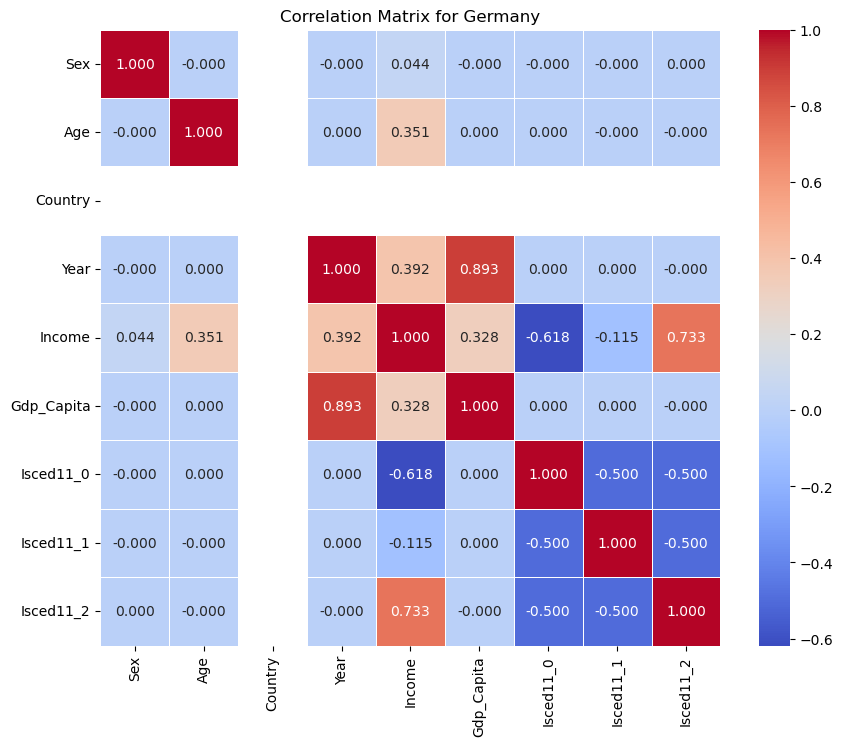

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation Matrix for Germany')
plt.show()


Intesting to notice if we pick Germany:
- the level instruction is highly correlated to income
- more high is the level better is correlated. Lower is the level is negatively correlated, so less money.
- The gdp per capita is related to year.
- the income is related to gdp per capita.
- the income depends on the year.
- There is no direct correlation from gdp per capita and instruction level.

In [64]:
backup_df

,Sex,Age,Country,Year,Income,Gdp_Capita,Isced11_0,Isced11_1,Isced11_2
0,0,0,0,2016,19660.0,48479.119012,True,False,False
1,0,0,0,2017,20751.0,50749.199548,True,False,False
2,0,0,0,2018,21544.0,55069.215523,True,False,False
3,0,0,0,2019,21989.0,53572.316727,True,False,False
4,0,0,0,2020,21142.0,52204.762699,True,False,False
...,...,...,...,...,...,...,...,...,...
2587,1,-1,26,2019,8756.0,20738.622885,False,False,True
2588,1,-1,26,2020,9340.0,20920.737487,False,False,True
2589,1,-1,26,2021,9898.0,23291.919078,False,False,True
2590,1,-1,26,2022,10421.0,22744.785017,False,False,True


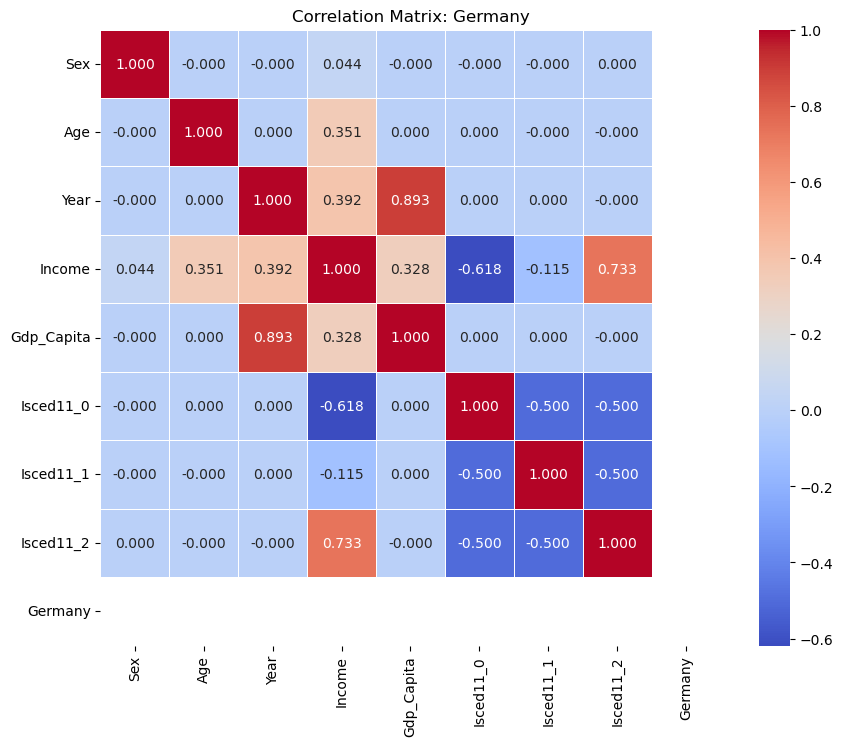

In [73]:
from sklearn.linear_model import LinearRegression
augment_df =  df_final_encoded
#three_main_economies = backup_df[(backup_df['Country']==5)]
#| (backup_df['Country']==15) | (backup_df['Country']==10)]
three_main_economies = backup_df[(backup_df['Country']==5)]
aggregated_df = pd.get_dummies(three_main_economies, columns=['Country'])
aggregated_df = aggregated_df.rename(columns={'Country_5': 'Germany'})
correlation_matrix = aggregated_df.corr() 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation Matrix: Germany')
plt.show()



We want to know in these three main economies, predict the income per education level? Just start with a regression model.

In [70]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
y = aggregated_df['Income']
X = aggregated_df.drop(columns=['Income', 'Gdp_Capita'], axis=1)  # Predictor variables
#y = three_main_economies['Income']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 , random_state = 100)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape


40      15249.0
41      15657.0
42      16303.0
43      17563.0
44      21501.0
         ...   
2419    23716.0
2420    28561.0
2421    28724.0
2422    28464.0
2423    29400.0
Name: Income, Length: 96, dtype: float64

In [71]:
X.head()

,Sex,Age,Year,Isced11_0,Isced11_1,Isced11_2,Germany
40,0,0,2016,True,False,False,True
41,0,0,2017,True,False,False,True
42,0,0,2018,True,False,False,True
43,0,0,2019,True,False,False,True
44,0,0,2020,True,False,False,True


In [72]:
y.head()

40    15249.0
41    15657.0
42    16303.0
43    17563.0
44    21501.0
Name: Income, dtype: float64

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test)

ValueError: x and y must have same first dimension, but have shapes (60,) and (29,)

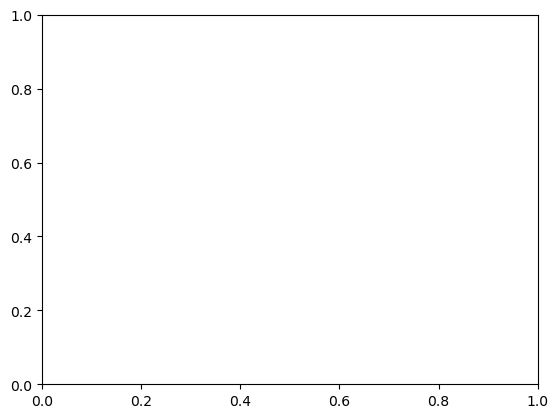

In [69]:
import matplotlib.pyplot as plt

c = [i for i in range(1, 61, 1)]  # Generating index
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
#fig.suptitle('Actual vs Predicted', fontsize=20)  # Plot heading
#plt.xlabel('Income', fontsize = 18)                  # X-label
#plt.ylabel('Sales', fontsize = 16)                  # Y-label
#plt.legend(fontsize = 8)                           # Adding legend
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')